<a id='Top'></a>
# Growth Analysis, 1st Report
## Moshe, August 15, 2017
#### Updated version of the basic fitting function, handles both 2- and 3-parameter fits as well as linear model
#### Prints crossing of hindering threshold when applicable
#### Better definition of h with connection to R, H

Here is a description of all the analysis I have done to date. The text contains links to the relevant results below. For convenience, a [list of all the links](#sec:Links) is given at the end of this text. 

## Background

Growth of a quantity $Q$ is described by
$$
    \frac{dQ}{dt} = rQ        \qquad (1)
$$
which can be taken as a definition of the growth rate $r$. While $r$ may be constant initially, when $Q$ grows to the point that it affects the enviroment in which it grows, $r$ can no longer remain constant as it is affected by $Q$ itself. To describe this growth hindering effect we express $r$ as

$$
    r = \frac{r_u}{f(Q)}
$$

Here $r_u$ is a constant describing unhindered growth when $Q$ has a ngligible effect on its environment, that is, $f(0) = 1$. We will also assume that $f$ is positive, but otherwise it is arbitrary. Let's expand $f(Q)$ in a Taylor series, retain only the 1st-order term and write the result as

$$
    f(Q) = 1 + \frac{Q}{Q_h}
$$

This is the definition of $Q_h$, the *hindering threshold*. Then

$$
    r = \frac{r_u}{1 + Q/Q_h}   
$$

When $Q$ exceeds $Q_h$, growth is hindered, an effect described by a declining growth rate $r$. It is important to note that this expression is only intended to account for the effect that $Q$ has on its environment. It cannot describe effects such as, for example, economic recession, where $r$ becomes negative; such effects can only be described by constructing a model for $r_u$ that includes also time variability, while here $r_u$ is taken as constant. With this expression for the growth rate, the solution of eq. 1 is

$$
    \ln\frac{Q}{Q[0]} + \frac{Q - Q[0]}{Q_h} = r_ut,             \qquad (2)
$$

giving us $Q$ as an implicit function of $t$ with the two free parameters $r_u$ and $Q_h$. At the point where $Q$ reaches $Q_h$, the growth rate drops to half its unhindered value. As long as $Q \ll Q_h$ the logarithmic term on the lhs of eq. 2 dominates, yielding standard exponential growth at the constant rate $r_u$. When $Q \gg Q_h$, the logarithmic term becomes negligible and $Q$ grows only linearly, the *hindered growth* mode. The hindering effect can be discerned in a given dataset if the data get into the regime where the linear growth term dominates. That is, hindering will manifest itself in the data if the ratio of the two terms on the left of eq. 2 exceeds unity:

$$
   H = \frac{R - 1}{q_h\ln R} > 1,   \qquad \hbox{where}\quad R = \frac{Q[N]}{Q[0]},\quad q_h = \frac{Q_h}{Q[0]}
$$

and $Q[0]$ and $Q[N]$ are the first and last entries in the dataset.

Here I report analysis of GDP- and population-growth with this expression. The data were fitted with the python tool
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">curve_fit</a>. More technical details of the fitting procedure are given [below](#numerics). 

**Aug 15:** The original definition of $h$ in the output was not particularly useful. Better to introduce

$$
    h = \frac{Q[N]}{Q_h},
$$

the degree of hindering found in the data.  Then

$$
    q_h = \frac{R}{h} \qquad \hbox{and}\quad H = h\frac{R - 1}{R\ln R} 
        = h\left(1 - \frac{1}{R}\right)\frac{1}{\ln R}
$$
This way, $h$ and $H$ are two indicators of hindering, with a simple relation between them.


<a id='sec:Dataset Long'></a>
## Dataset 'Long'

Scott's spreadsheet "GDP Time Series_Long.xlsx" contains GDP time series for a few nations. Among those, Russia has fewer than 45 entries, the (arbitrary) minimum I set for meaningful analysis. All data are in 2010 USD, except for UK, which is in 2010 pounds. **We need to convert the UK data to 2010 USD for uniformity**. Although UK data have entries that go all the way back to 1280, I used only the entries from 1700 onward. 
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">curve_fit</a> fitted sucesfuly the GDP data of China, UK and US to eq. 2 with $r_u$ and $Q_h$ as free parameters; here are the [detailed results](#modeling Long) (for historical reasons, I am still using here and there qs for $q_h$; will slowly get rid of that). Of the three, the US fit is the most impressive --- 227 data points fitted with 2 free parameters with a 14% average deviation of model from data, the largest deviation 46% (in 1890). The quality of the fits is also evident from the [plots of the models](#plotting Long). The fits are done directly to the GDP, which is a fairly smooth function, as is evident from the top panel of each figure. In contrast, the growth rates (bottom panels) are very noisy. 

The US is the only economy to show the hindering effect, as best seen in the [summary tabulations](#summary Long) of the model results: While the hindering parameter is of order 10$^{-9}$ for the UK and China, it is 8% for the US. The model prediction is that the US GDP will exceed its hindering value of 28 trillion USD (2010) sometime in 2030, at which point the predicted growth rate will become 2 percent per year, and that in 2050 it will reach 34 trillion USD (2010) with an underlying growth rate of 1.64 percent per year. Neither China nor UK show any signs of hindering. This is most remarkable for the UK with 317 data points, which are fitted successfully by pure exponential growth at 1.6 percent per year. China, too, shows no long-term deviation from pure exponential growth at 7.65%/yr. In this case, though, the time series involves only 57 data points, which as we all know cover some stormy history. It seems that if we started fitting only after China opened its economy, the results could be different, but then the series will be even shorter. I wouldn't bet much on the model predictions for China of 7.65%/yr growth rate and 126 trillion UDS (2010) GDP in 2050. The lack of hindering of the UK growth is much more meaningful.

Although we do not use the growth rate in the anlysis, it is still a mesaure of the GDP variation. In an attempt to get rid of some noise, it is instructive to examine [growth rate running averages](#Growth Rates) for the 4 nations in this dataset. With hundreds of data points, the UK and US running averages clearly reveal long term trends. The downwards trend for the US is a manifestation of the growth hindering effect. The slight upward trend for the UK is soemwhat puzzling, and we may wish to withold judgement until all issues regarding this dataset are resolved. The almost constant decline of the growth rate of Japan may be the reason for the model failure; perhaps this is an example of a case where one has to go to hindering terms higher than linear.


<a id='sec:Dataset All67'></a>
## Dataset 'All67'

Scott's spreadsheet "All_from67.xlsx" lists every country in the world, with GDP (2010 USD) from 1967-2015 for many of them. 110 nations have data with more than 45 points and the model fits successfuly 94 of those. Here are the [detailed results](#modeling All67), the [modeling summary](#summary All67) and some [sample plots](#All67 plots); plots of all 94 models are accessible in a single, <a href="https://drive.google.com/file/d/0B4jH0AOmz8xZUUJtVXhDWTVYSUk/view?usp=sharing">separate file</a>.

Since the US and UK have also substantially larger datasets, it is instructive to compare the models derived from the two; here is a comparison of the significant properties: 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-lqy6{text-align:right;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-baqh" colspan="2">US<br></th>
    <th class="tg-baqh" colspan="2">UK<br></th>
  </tr>
  <tr>
    <td class="tg-yw4l"><br></td>
    <td class="tg-baqh">'Long'</td>
    <td class="tg-baqh">'All67'</td>
    <td class="tg-baqh">'Long'</td>
    <td class="tg-baqh">'All67'</td>
  </tr>
  <tr>
    <td class="tg-yw4l">#points</td>
    <td class="tg-lqy6">227</td>
    <td class="tg-lqy6">49</td>
    <td class="tg-lqy6">317</td>
    <td class="tg-lqy6">49</td>
  </tr>
  <tr>
    <td class="tg-yw4l">$r_u$ (%/yr)<br></td>
    <td class="tg-lqy6">4.00</td>
    <td class="tg-lqy6">5.08</td>
    <td class="tg-lqy6">1.60</td>
    <td class="tg-lqy6">4.02</td>
  </tr>
  <tr>
    <td class="tg-yw4l">$Q_h$ (2010USD)<br></td>
    <td class="tg-lqy6">2.37E+13</td>
    <td class="tg-lqy6">1.21E+13</td>
    <td class="tg-lqy6">1.14E+20</td>
    <td class="tg-yw4l">2.30E+12</td>
  </tr>
  <tr>
    <td class="tg-yw4l">$H$</td>
    <td class="tg-lqy6">0.0864</td>
    <td class="tg-lqy6">0.753</td>
    <td class="tg-yw4l">2.970E-09</td>
    <td class="tg-lqy6">0.704</td>
  </tr>
  <tr>
    <td class="tg-yw4l">GDP[2050] (2010USD)<br></td>
    <td class="tg-lqy6">3.42E+13</td>
    <td class="tg-yw4l">3.12E+13</td>
    <td class="tg-yw4l">2.69E+12*</td>
    <td class="tg-yw4l">4.72E+12</td>
  </tr>
  <tr>
    <td class="tg-yw4l">r[2050]  (%/yr)<br></td>
    <td class="tg-lqy6">1.64</td>
    <td class="tg-lqy6">1.42</td>
    <td class="tg-lqy6">1.60</td>
    <td class="tg-lqy6">1.32</td>
  </tr>
</table>

The shorter 'All67' dataset yields solutions with larger $r_u$ and larger $H$ (smaller $Q_h$), for a stronger hindrance effect. In the UK case, the two solutions are entirely different: while the 'Long' series yields pure exponential growth at a constant 1.60%/yr, the shorter 'All67' produces a very significant hindering effect. This could simply reflect a strong UK economy in the first few years of this dataset (late '60s -- early '70s). Interestingly, the predictions of both models for the 2050 growth rate are not that different. The two model predictions for the 2050 GDP cannot be directly compared because of the different units for the UK in the 'Long' dataset (hence the asterisk). For the US, the differences between the two models are significant, though not as dramatic. Both models show a significant hindering effect and their predictions for the 2050 GDP are quite similar. These comparisons show the perils that can await analysis of data that cover insufficient time spans. We need to think about this point and try to devise some methods to address this issue. 

Back to the full 'All67' set. For such a large list it's better to concentrate on the [summary](#summary All67), which is sorted on the hindrance parameter $H$ (the table shows that $H \approx Q_f/Q_h$ which is easy to understand since $R \gg 1$ for most nations, thus the two are the same apart from the logarithmic factor $\ln R$). A large group of nations have $H < 10^{-4}$ and are characterized by pure exponential growth --- no hindering effect. A second group has $H$ in the range of ~ 10$^{-2}$ to ~ 1--2. These are economies exhibiting the hindering effect. The 3 nations whose models are [plotted below](#All67 plots) fall in this range and have very successful fits: For Canada, the average deviation of model from data is only 2.92%, the largest deviation only 6.65%; for the Netherlands the corresponding deviations are 4.51% and 9.17%, for Norway 2.82% and 5.53%. 

In the final group are nations whose $H$ exceeds ~3, corresponding to strongy hindered growth. In these cases the onset of hindering occurred long before the beginning of the data, GDP is growing linearly throughout the entire period covered by the data and the parameters employed in the fitting lose their original meaning. For example, Belgium, with the largest $H$ = 29, is fitted to an average deviation of model from data of only 2.69% and largest deviation of 9.90% --- obviously an excellent fit. But this model has an unrealistic $r_u$ = 72.95%/yr, which can be understood only when we realize that it also has $Q_h = 6.29\times10^{-2}Q[0]$; namely, the first entry in the dataset (the 1967 GDP of 1.65E+11 USD 2010)) is 16 times larger than the hindering GDP (of only 1.04E+10 USD 2010). The meaningful quantity is the product $r_u Q_h$ = 7.59 billion USD per year, the constant amount by which the Belgian GDP has increased every year throughout the covered period. Therefore, in these cases it makes more sense to model the GDP directly with the linear growth function

$$
    GDP = G_0( 1 + r_0t),
$$

which yields an annual growth rate $r = r_0G_0/GDP$. The results of such linear modeling are [shown below](#linear) for the 4 nations with the largest values of $H$ (Liberia should be ignored because of the erratic behavior of its GDP); note the linear, rather than logarithmic $y$-axis in each top panel. While the linear model for Belgium is even slightly more successful (2.54% and 8.11% average and maximum deviations), the important point is that its parameters are much more meaningful: $r_0$ = 4.27 %/year and $G_0$ = 1.68E+11 USD 2010. The annual GDP increase is $r_0 G_0$ = 7.17 billion USD per year, similar to the previous result. Like Belgium, Denmark too is an example of an economy that switched to linear growth long ago, and it would be great if we could get data that covered another 100 years or so back to try and catch the onset of hindering. In the cases of Brazil and Cameroon the linear fits are very reasonable, but these economies seem somewhat less stable. 

<a id='sec:World Population'></a>
## World Population

Population data is available from the <a href="https://esa.un.org/unpd/wpp/Download/Standard/Population/">UN Population Reference Bureau</a>.  Modeling of the [world population](#World Population) from 1950--2015 yields an almost perfect fit: the average deviation of model from data is 1.13%, the largest deviation (in 1963) is 2.72%. The model parameters are $r_u$ = 3.23%/yr and $Q_h$ = 4.82 billion (so that $Q = Q_h$ occurred in 1985), for a hindering parameter $H$ = 0.94. The model predictions for 2050 are a world population of 11 billion, growing at an annual rate of 0.98%. The model success reflects the smooth time variation of the world population. Unlike the noisy variability of GDP growth rates, the population growth rate is a smooth function; its 5-year rolling average coincides with the function itself, which is why it is not plotted. It would be interesting to extend the data to earlier years and perform similar analysis for the populations of individual continents.

## Fisher's Equation

<a href="https://en.wikipedia.org/wiki/Fisher%27s_equation">The Fisher equation</a> is a diffusion equation containing another attempt to describe the decrease in growth rate as a quantity grows. The equation's time-dependent part can be written as

$$
    \frac{dq}{dt} = rq(1 - q) 
$$

with $r$ a constant. Thus the growth rate is $r(1 - q)$, another form of 'hindering'. As long as $q \ll 1$, the Fisher hindering is the 1st-order expansion of ours, which is $r/(1 + q)$. But the Fisher hindering predicts an altogether disappearance of growth when $q \to 1$, i.e, $q = 1$ is an absolute upper limit for the growing quantity. The 'Fisher hindering' will never produce the linear growth we clearly identified in a number of nations. In the Fisher-Kolmogorov variant, the growth rate is $r(1 - q^p)$, similarly predicting an ultimate end to growth and no linear growth mode.   

<a id='sec:Todo'></a>
## Todo List

1. Clean up the UK 'Long' data series, make sure it's in 2010 USD (for Scott).

2. Some more GDP data. Of particular interest are data that show the transition to hindering; such data have $H$ in the range ~ 0.1 -- 1. Would be nice to have the data of nations like Netherlands and Denmark extended back in time to catch the onset of hindering. The main item we should add is the world GDP, going back as far as possible.

3. Need better understanding of the data analysis. A list of questions is listed in the [Data Analysis](#numerics) section below. Hopefully, this is where Zeljko shows his stuff.

4. Additional analysis of population growth: Extend the world population time series, analyze individual regions and/or continents. 


<a id='sec:Links'></a>
## Links:

[Long dataset, modeling](#modeling Long)

[Long dataset, modeling summary](#summary Long)

[Long dataset, plots](#plotting Long)

[Long dataset, growth rate analysis](#Growth Rates)

[All67 dataset, modeling](#modeling All67)

[All67 dataset, modeling summary](#summary All67)

[All67, sample plots](#All67 plots)

<a href="https://drive.google.com/file/d/0B4jH0AOmz8xZUUJtVXhDWTVYSUk/view?usp=sharing">All67, all plots</a>

[Linear modeling examples](#linear)

[World Population](#World Population)

[Data Analysis](#numerics)

[3-parameter fits](#3-parameters)


In [1]:
import numpy as np
from numpy import exp, sqrt, log as ln, log10 as log
import matplotlib.pyplot as plt
import sys
sys.path.append('../Tools')
from ME_utils import *
from econ import *
from GDP import *
from POP import *

[Back to the Top](#sec:Dataset Long)

# Long dataset --- Modeling <a id='modeling Long'></a>

In [2]:
data_set = Long
args = analyze(data_set)

C:\Users\moshe\Miniconda2\lib\site-packages\openpyxl\reader\worksheet.py:310: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


China: 57 data points
GDP has grown from 1.28E+11($10) in 1960 to 9.51E+12($10) in 2016
an increase by factor of 74

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [7.655E+00, 6.597E+09]
*** Best-fit parameters:
   ru = 7.65%      unhindered (unsaturated) growth rate
   Qh = 8.44E+20   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 6.60E+09
  Relative errors of fitting parameters:
   err(ru) = 3.29E-03
   err(Qh) = 2.72E-30
***Data covers a range of 4.29 growth times
***Hindering paramater H = 2.579E-09
   Hindering degree Qf/Qh = 1.13E-08
***Average deviation of model from data is 25.47%
   largest deviation of model from data is 43.94% in 1977

***Model predictions for 2050 for China economy:
   GDP of 1.26E+14 $10 and annual growth rate 7.65%

______________________________________________________________________ 

Japan: 57 data points
GDP has grown from 7.96E+11($10) in 1960 to 6.05E+12($10) in 2016
an increase by factor of 7.6

*** 2-parameter fi

[Back to the Top](#sec:Dataset Long)

# Long dataset modeling --- Summary <a id='summary Long'></a>

In [3]:
Nations, success, Year, GDP, ru, Qh, future, G_model, r_model = summary_print(*args)

Successful fits for 3 nations out of 4

R = Qf/Qi              last-to-first years of data
H = (R - 1)/(qs*ln R)  Hindrance parameter

nation                 entries     R     r_u(%)     qs     Qf/Qh       H
____________________________________________________________________________
China                    57       74.3    7.65   6.6e+09  1.13e-08  2.58e-09
UK (2010 POUNDS)        317        180    1.60  1.16e+10  1.55e-08  2.97e-09
US                      227   3.83e+03    4.00  5.37e+03     0.713    0.0864

**************************************************************************** 

Sorted by H:
nation                 entries     R     r_u(%)     qs     Qf/Qh       H
____________________________________________________________________________
China                    57       74.3    7.65   6.6e+09  1.13e-08  2.58e-09
UK (2010 POUNDS)        317        180    1.60  1.16e+10  1.55e-08  2.97e-09
US                      227   3.83e+03    4.00  5.37e+03     0.713    0.0864

Failed to

[Back to the Top](#sec:Dataset Long)

# Long dataset --- Plotting <a id='plotting Long'></a>

Plotting results for China


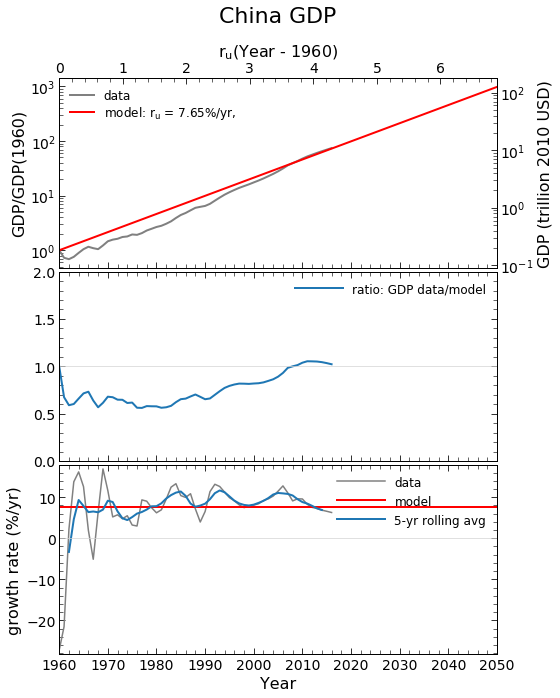

Plotting results for UK (2010 POUNDS)


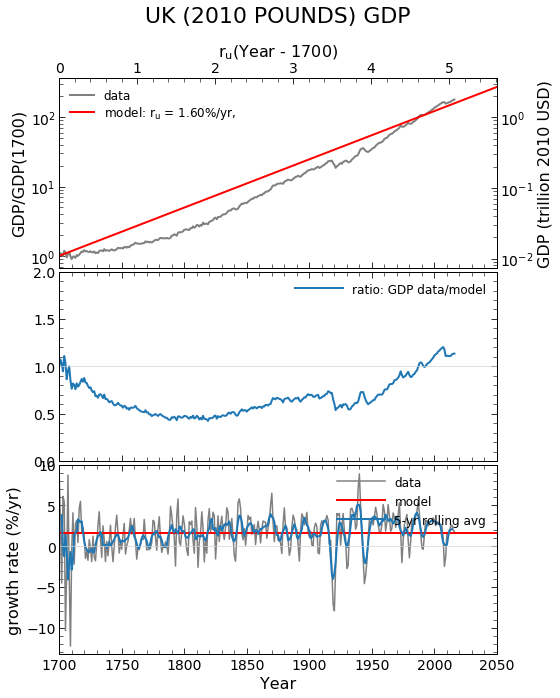

Plotting results for US


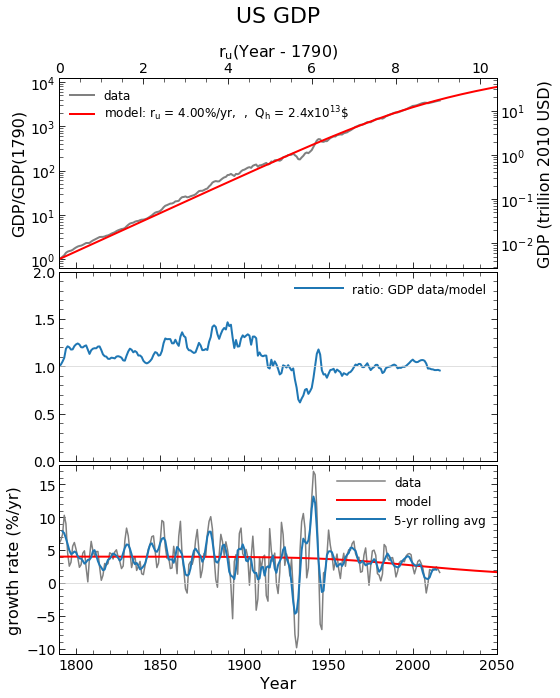

In [4]:
dn = 5; loc_top = 'upper left'; loc_bot = 'upper right'
for nation in success:
     print 'Plotting results for',nation
     gr, avg = gr_data(GDP[nation], Year[nation])   
     basic_plot(nation, Year[nation], GDP[nation], gr, avg, 
           r_u=ru[nation], Qh=Qh[nation], Q0='',
           loc_top=loc_top, loc_bot=loc_bot, 
           future=future[nation], top_axis=True, dn=dn, 
           model_r=r_model[nation], model_Q=G_model[nation]) 
     plt.show()

[Back to the Top](#sec:Dataset Long)

In [5]:
data_set = Long
Nations, Year, GDP = excel(*data_set)
x0, x1 = [], []
gr, avg = {}, {}
for nation in Nations:
    gr[nation], avg[nation] = gr_data(GDP[nation], Year[nation])
    x0.append(Year[nation][0])
    x1.append(Year[nation][-1])
x_range = (max(x0), max(x1))

[Back to the Top](#sec:Dataset Long)
# Growth Rates <a id='Growth Rates'></a>

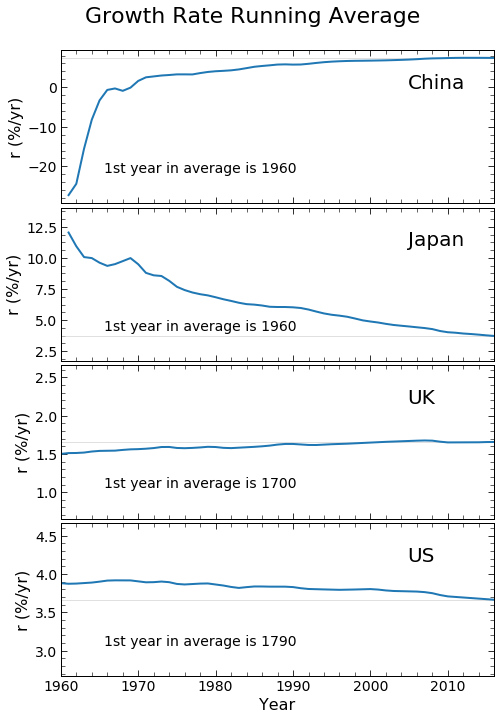

In [6]:
plot_avg(Nations, Year, avg, x_range)
plt.show()

[Back to the Top](#sec:Dataset Long)

# All67 dataset --- Modeling <a id='modeling All67'></a>

In [7]:
data_set = All67
args = analyze(data_set)

Algeria: 49 data points
GDP has grown from 2.99E+10($10) in 1967 to 1.90E+11($10) in 2015
an increase by factor of 6.3

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [1.145E+01, 1.315E+00]
*** Best-fit parameters:
   ru = 11.45%      unhindered (unsaturated) growth rate
   Qh = 3.94E+10   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 1.32E+00
  Relative errors of fitting parameters:
   err(ru) = 2.29E-01
   err(Qh) = 3.58E-01
***Data covers a range of 5.50 growth times
***Hindering paramater H = 2.198E+00
   Hindering degree Qf/Qh = 4.82
   Hindering threshold (Q > Qh) crossed in 1972
   Hindered growth mode has a rate of 4.51E+09 USD10 per year
***Average deviation of model from data is 8.30%
   largest deviation of model from data is 19.74% in 1979

***Model predictions for 2050 for Algeria economy:
   GDP of 3.12E+11 $10 and annual growth rate 1.28%

______________________________________________________________________ 

Argentina: 49 data points

 Final result  --- [6.513E+00, 1.007E+00]
*** Best-fit parameters:
   ru = 6.51%      unhindered (unsaturated) growth rate
   Qh = 2.07E+09   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 1.01E+00
  Relative errors of fitting parameters:
   err(ru) = 4.93E-01
   err(Qh) = 8.01E-01
***Data covers a range of 3.00 growth times
***Hindering paramater H = 1.627E+00
   Hindering degree Qf/Qh = 2.48
   Hindering threshold (Q > Qh) crossed in 1968
   Hindered growth mode has a rate of 1.35E+08 USD10 per year
***Average deviation of model from data is 5.29%
   largest deviation of model from data is 14.73% in 2013

***Model predictions for 2050 for Bermuda economy:
   GDP of 9.99E+09 $10 and annual growth rate 1.12%

______________________________________________________________________ 

Bolivia: 49 data points
GDP has grown from 6.96E+09($10) in 1967 to 2.57E+10($10) in 2015
an increase by factor of 3.7

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [2.304E

 Final result  --- [4.058E+00, 1.913E+08]
*** Best-fit parameters:
   ru = 4.06%      unhindered (unsaturated) growth rate
   Qh = 7.30E+18   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 1.91E+08
  Relative errors of fitting parameters:
   err(ru) = 7.34E-03
   err(Qh) = 3.79E-26
***Data covers a range of 1.95 growth times
***Hindering paramater H = 1.596E-08
   Hindering degree Qf/Qh = 3.61E-08
***Average deviation of model from data is 9.80%
   largest deviation of model from data is 31.39% in 1983

***Model predictions for 2050 for Chile economy:
   GDP of 1.11E+12 $10 and annual growth rate 4.06%

______________________________________________________________________ 

China: 49 data points
GDP has grown from 1.40E+11($10) in 1967 to 8.91E+12($10) in 2015
an increase by factor of 64

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [8.693E+00, 5.036E+09]
*** Best-fit parameters:
   ru = 8.69%      unhindered (unsaturated) growth rate
   Qh = 7.03E+

 Final result  --- [2.120E+00, 2.382E+07]
*** Best-fit parameters:
   ru = 2.12%      unhindered (unsaturated) growth rate
   Qh = 2.04E+17   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 2.38E+07
  Relative errors of fitting parameters:
   err(ru) = 1.91E-02
   err(Qh) = 1.04E-23
***Data covers a range of 1.02 growth times
***Hindering paramater H = 7.277E-08
   Hindering degree Qf/Qh = 1.16E-07
***Average deviation of model from data is 8.89%
   largest deviation of model from data is 28.98% in 1978

***Model predictions for 2050 for El Salvador economy:
   GDP of 4.97E+10 $10 and annual growth rate 2.12%

______________________________________________________________________ 

Fiji: 49 data points
GDP has grown from 9.21E+08($10) in 1967 to 3.88E+09($10) in 2015
an increase by factor of 4.2

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Failed to fit the data for Fiji

____________

 Final result  --- [3.970E+00, 3.719E+01]
*** Best-fit parameters:
   ru = 3.97%      unhindered (unsaturated) growth rate
   Qh = 1.18E+11   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 3.72E+01
  Relative errors of fitting parameters:
   err(ru) = 3.18E-02
   err(Qh) = 5.26E-01
***Data covers a range of 1.91 growth times
***Hindering paramater H = 7.404E-02
   Hindering degree Qf/Qh = 0.158
   Hindered growth mode has a rate of 4.69E+09 USD10 per year
***Average deviation of model from data is 3.49%
   largest deviation of model from data is 17.91% in 1979

***Model predictions for 2050 for Honduras economy:
   GDP of 5.52E+10 $10 and annual growth rate 2.71%

______________________________________________________________________ 

Hong Kong SAR, China: 49 data points
GDP has grown from 1.83E+10($10) in 1967 to 2.64E+11($10) in 2015
an increase by factor of 14

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [1.170E+01, 4.549E+00]
*** Best-fit param

Optimal parameters not found: The maximum number of function evaluations is exceeded.
Failed to fit the data for Italy

______________________________________________________________________ 

Jamaica: 49 data points
GDP has grown from 6.87E+09($10) in 1967 to 1.36E+10($10) in 2015
an increase by factor of 2

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Failed to fit the data for Jamaica

______________________________________________________________________ 

Japan: 49 data points
GDP has grown from 1.53E+12($10) in 1967 to 5.99E+12($10) in 2015
an increase by factor of 3.9

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
Optimal parameters not found: The maximum number of function evaluations is exceeded.
Failed to fit the data for Japan

______________________________________________________________________ 

Kenya: 49 data points
GDP has grown from 6.09E+09($10) in 1967 to 5.22E+10(

 Final result  --- [2.912E+00, 9.008E+07]
*** Best-fit parameters:
   ru = 2.91%      unhindered (unsaturated) growth rate
   Qh = 1.07E+17   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 9.01E+07
  Relative errors of fitting parameters:
   err(ru) = 1.44E-02
   err(Qh) = 3.41E-25
***Data covers a range of 1.37 growth times
***Hindering paramater H = 2.570E-08
   Hindering degree Qf/Qh = 4.95E-08
***Average deviation of model from data is 8.21%
   largest deviation of model from data is 15.94% in 2002

***Model predictions for 2050 for Mauritania economy:
   GDP of 1.34E+10 $10 and annual growth rate 2.91%

______________________________________________________________________ 

Mexico: 49 data points
GDP has grown from 2.25E+11($10) in 1967 to 1.21E+12($10) in 2015
an increase by factor of 5.4

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [1.974E+01, 5.412E-01]
*** Best-fit parameters:
   ru = 19.74%      unhindered (unsaturated) growth rate
   Qh 

 Final result  --- [4.564E+00, 2.851E+08]
*** Best-fit parameters:
   ru = 4.56%      unhindered (unsaturated) growth rate
   Qh = 1.19E+18   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 2.85E+08
  Relative errors of fitting parameters:
   err(ru) = 9.01E-03
   err(Qh) = 2.75E-26
***Data covers a range of 2.19 growth times
***Hindering paramater H = 1.384E-08
   Hindering degree Qf/Qh = 3.56E-08
***Average deviation of model from data is 10.31%
   largest deviation of model from data is 20.87% in 1982

***Model predictions for 2050 for Panama economy:
   GDP of 1.84E+11 $10 and annual growth rate 4.56%

______________________________________________________________________ 

Papua New Guinea: 48 data points
GDP has grown from 2.41E+09($10) in 1967 to 1.33E+10($10) in 2014
an increase by factor of 5.5

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [3.277E+00, 6.304E+07]
*** Best-fit parameters:
   ru = 3.28%      unhindered (unsaturated) growth rate


 Final result  --- [2.613E+00, 2.022E+07]
*** Best-fit parameters:
   ru = 2.61%      unhindered (unsaturated) growth rate
   Qh = 2.43E+18   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 2.02E+07
  Relative errors of fitting parameters:
   err(ru) = 8.54E-03
   err(Qh) = 1.26E-23
***Data covers a range of 1.25 growth times
***Hindering paramater H = 9.826E-08
   Hindering degree Qf/Qh = 1.72E-07
***Average deviation of model from data is 5.89%
   largest deviation of model from data is 16.86% in 1981

***Model predictions for 2050 for South Africa economy:
   GDP of 1.05E+12 $10 and annual growth rate 2.61%

______________________________________________________________________ 

Spain: 49 data points
GDP has grown from 3.78E+11($10) in 1967 to 1.41E+12($10) in 2015
an increase by factor of 3.7

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [1.155E+01, 7.322E-01]
*** Best-fit parameters:
   ru = 11.55%      unhindered (unsaturated) growth rate
   Qh

 Final result  --- [4.025E+00, 2.602E+00]
*** Best-fit parameters:
   ru = 4.02%      unhindered (unsaturated) growth rate
   Qh = 2.30E+12   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 2.60E+00
  Relative errors of fitting parameters:
   err(ru) = 1.25E-01
   err(Qh) = 3.20E-01
***Data covers a range of 1.93 growth times
***Hindering paramater H = 7.039E-01
   Hindering degree Qf/Qh = 1.16
   Hindering threshold (Q > Qh) crossed in 2004
   Hindered growth mode has a rate of 9.27E+10 USD10 per year
***Average deviation of model from data is 3.09%
   largest deviation of model from data is 9.03% in 1973

***Model predictions for 2050 for United Kingdom economy:
   GDP of 4.72E+12 $10 and annual growth rate 1.32%

______________________________________________________________________ 

United States: 49 data points
GDP has grown from 4.29E+12($10) in 1967 to 1.66E+13($10) in 2015
an increase by factor of 3.9

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result 

[Back to the Top](#sec:Dataset All67)

# All67 dataset modeling --- Summary <a id='summary All67'></a>

In [8]:
Nations, success, Year, GDP, ru, Qh, future, G_model, r_model = summary_print(*args, names_too=False)

Successful fits for 94 nations out of 110

R = Qf/Qi              last-to-first years of data
H = (R - 1)/(qs*ln R)  Hindrance parameter


**************************************************************************** 

Sorted by H:
nation                 entries     R     r_u(%)     qs     Qf/Qh       H
____________________________________________________________________________
Sri Lanka                49       10.2    4.71  1.34e+09  7.58e-09  2.95e-09
China                    49       63.8    8.69  5.04e+09  1.27e-08     3e-09
Nepal                    49       6.18    3.71  4.57e+08  1.35e-08  6.22e-09
Mali                     49       6.53    3.82  4.04e+08  1.61e-08  7.29e-09
India                    49         13    5.10  5.37e+08  2.43e-08  8.73e-09
Burkina Faso             49       7.98    4.15  3.22e+08  2.48e-08  1.04e-08
Malawi                   49       6.43    3.75  2.79e+08  2.31e-08  1.05e-08
Benin                    49       5.64    3.49   2.4e+08  2.35e-08  1.12e-08
Mya

[Back to the Top](#sec:Dataset All67)

# All67, sample plots <a id='All67 plots'></a>

Plotting results for Canada


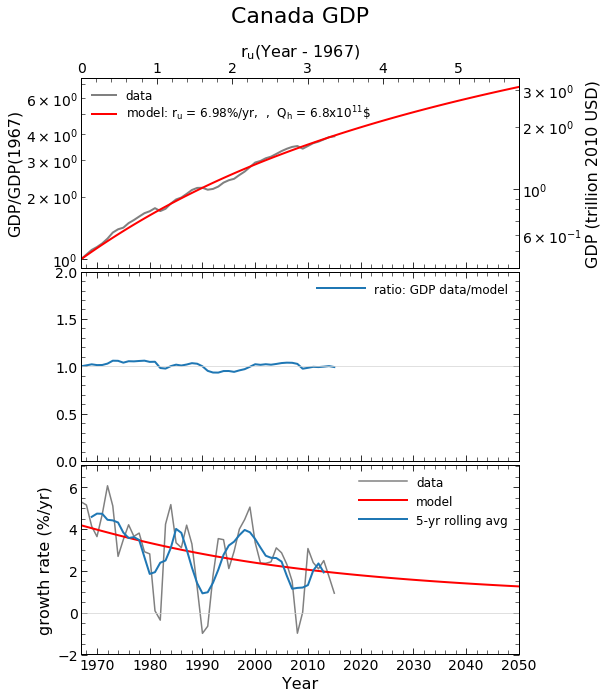

Plotting results for Netherlands


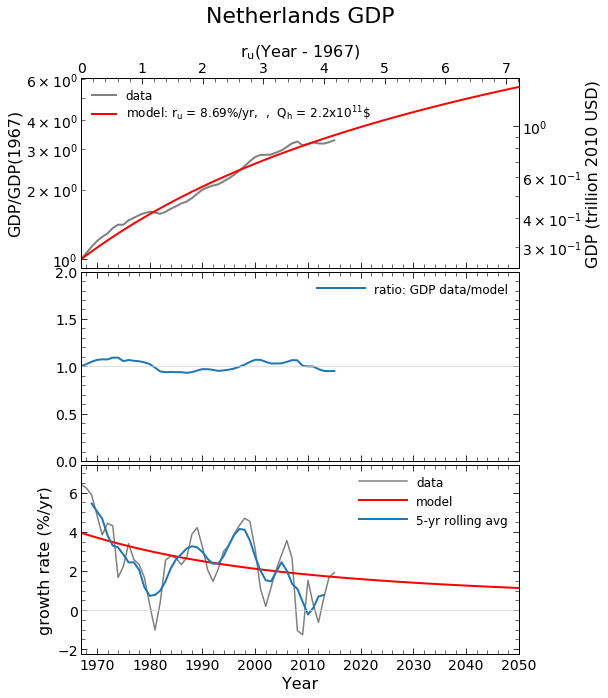

Plotting results for Norway


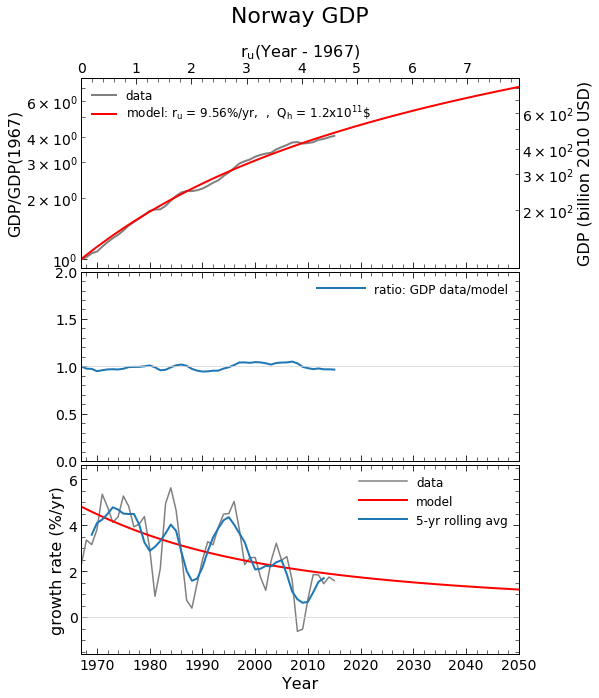

In [9]:
dn = 5; loc_top = 'upper left'; loc_bot = 'upper right'
for nation in ['Canada', 'Netherlands', 'Norway']:
    print 'Plotting results for',nation
    r, avg = gr_data(GDP[nation], Year[nation])
    basic_plot(nation, Year[nation], GDP[nation], r, avg, 
        top_axis=True, loc_top=loc_top, loc_bot=loc_bot, 
        r_u=ru[nation], Qh=Qh[nation], future=future[nation], dn=dn, 
        model_r=r_model[nation], model_Q=G_model[nation]) 
    plt.show()

[Back to the Top](#sec:Dataset All67)

# Linear modeling <a id='linear'></a>

Belgium: 49 data points
GDP has grown from 1.65E+11($10) in 1967 to 5.08E+11($10) in 2015
an increase by factor of 3.1

*** Fitting with linear model:   Q = Q0*(1 + r0*t)
 Initial guess --- None
 Final result  --- [1.021E+00, 4.359E-02]
*** Best-fit parameters:
   r0 = 4.27 %/year    Q0 = 1.68E+11 2010USD
   GDP increasses by 7.19E+09 USD10 per year
  Relative errors of fitting parameters:
   err(r0) = 1.64E-02   err(G0)= 1.38E-02
***Average deviation of model from data is 2.54%
   largest deviation of model from data is 8.11% in 1974

***Model predictions for 2050 for Belgium economy:
   GDP of 7.65E+11 $10 and annual growth rate 0.94%

______________________________________________________________________ 



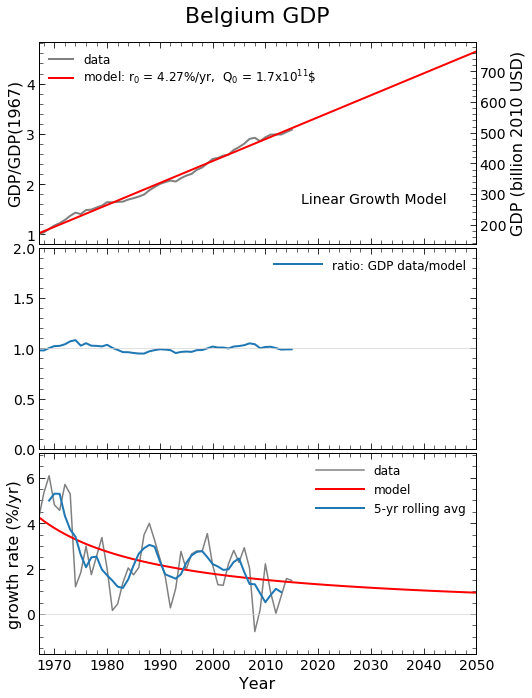

______________________________________________________________________ 

Denmark: 49 data points
GDP has grown from 1.33E+11($10) in 1967 to 3.41E+11($10) in 2015
an increase by factor of 2.6

*** Fitting with linear model:   Q = Q0*(1 + r0*t)
 Initial guess --- None
 Final result  --- [9.953E-01, 3.456E-02]
*** Best-fit parameters:
   r0 = 3.47 %/year    Q0 = 1.32E+11 2010USD
   GDP increasses by 4.58E+09 USD10 per year
  Relative errors of fitting parameters:
   err(r0) = 1.89E-02   err(G0)= 1.95E-02
***Average deviation of model from data is 2.87%
   largest deviation of model from data is 6.61% in 2006

***Model predictions for 2050 for Denmark economy:
   GDP of 5.12E+11 $10 and annual growth rate 0.89%

______________________________________________________________________ 



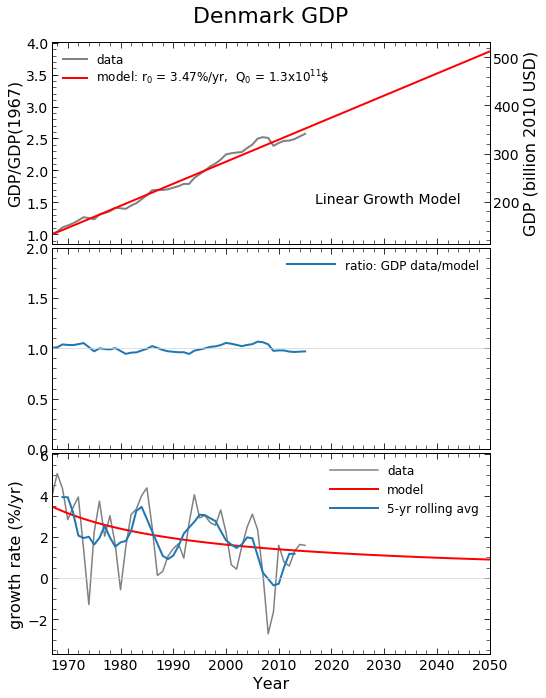

______________________________________________________________________ 

Cameroon: 49 data points
GDP has grown from 4.96E+09($10) in 1967 to 3.04E+10($10) in 2015
an increase by factor of 6.1

*** Fitting with linear model:   Q = Q0*(1 + r0*t)
 Initial guess --- None
 Final result  --- [9.749E-01, 8.759E-02]
*** Best-fit parameters:
   r0 = 8.98 %/year    Q0 = 4.84E+09 2010USD
   GDP increasses by 4.35E+08 USD10 per year
  Relative errors of fitting parameters:
   err(r0) = 1.26E-01   err(G0)= 5.04E-02
***Average deviation of model from data is 11.35%
   largest deviation of model from data is 36.65% in 1986

***Model predictions for 2050 for Cameroon economy:
   GDP of 4.09E+10 $10 and annual growth rate 1.06%

______________________________________________________________________ 



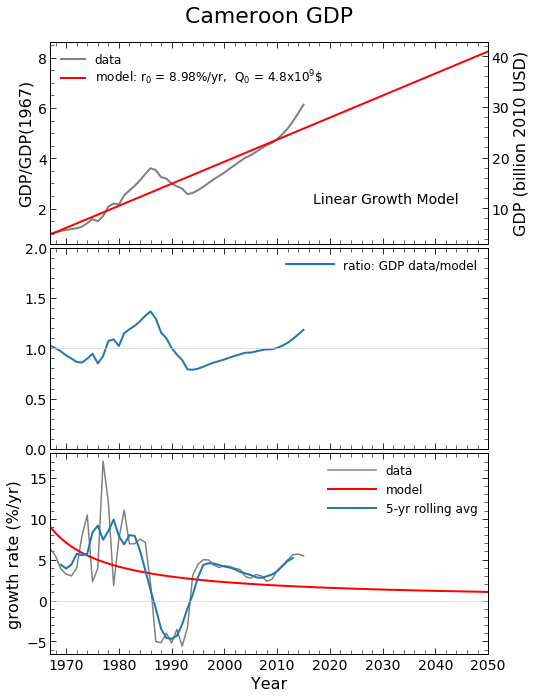

______________________________________________________________________ 

Brazil: 49 data points
GDP has grown from 3.37E+11($10) in 1967 to 2.33E+12($10) in 2015
an increase by factor of 6.9

*** Fitting with linear model:   Q = Q0*(1 + r0*t)
 Initial guess --- None
 Final result  --- [1.022E+00, 1.188E-01]
*** Best-fit parameters:
   r0 = 11.62 %/year    Q0 = 3.45E+11 2010USD
   GDP increasses by 4.01E+10 USD10 per year
  Relative errors of fitting parameters:
   err(r0) = 8.37E-02   err(G0)= 2.59E-02
***Average deviation of model from data is 6.31%
   largest deviation of model from data is 16.72% in 1980

***Model predictions for 2050 for Brazil economy:
   GDP of 3.67E+12 $10 and annual growth rate 1.09%

______________________________________________________________________ 



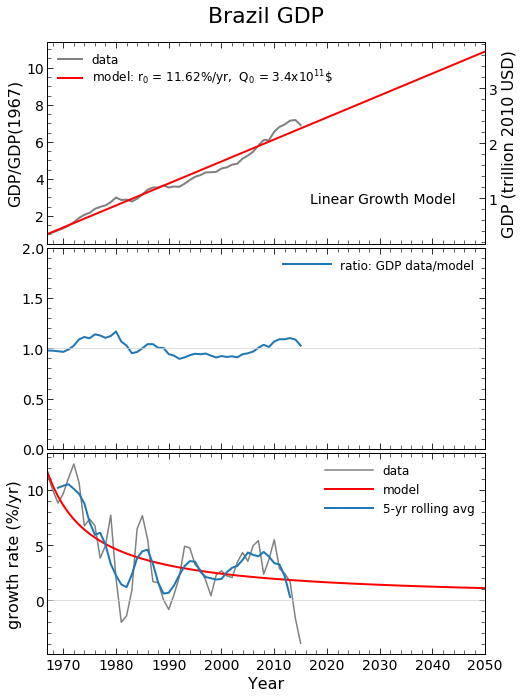

______________________________________________________________________ 



In [10]:
data_set = All67
Nations, Year, GDP = excel(*data_set)
r0, Q0, future, Q_lin_model, r_lin_model = {}, {}, {}, {}, {}
for nation in ['Belgium', 'Denmark', 'Cameroon', 'Brazil'] :
    r0[nation], Q0[nation], _, future[nation],\
    Q_lin_model[nation], r_lin_model[nation] \
       = fitting(nation, GDP[nation], Year[nation], mode='lin')
    r, avg = gr_data(GDP[nation], Year[nation])
    basic_plot(nation, Year[nation], GDP[nation], r, avg, 
        r_u=r0[nation], Qh=Q0[nation], future=future[nation], dn=dn, 
        model_r=r_lin_model[nation], model_Q=Q_lin_model[nation],linear=True) 
    plt.show()
    print 70*'_','\n' 

[Back to the Top](#sec:Dataset All67)

In [11]:
fname = '../Data/World_POP.dat'
unit = 1.E3
POP_data = np.genfromtxt(fname, skip_header=1, usecols=(0,1), unpack=True,
              dtype=[('Year','i'),('POP','f')])
Years, POP = POP_data['Year'], unit*POP_data['POP']
r, avg = gr_data(POP, Years)

[Back to the Top](#sec:World Population)
# World Population <a id='World Population'></a>

World: 66 data points
Population has grown from 2.53E+09 in 1950 to 7.35E+09 in 2015
an increase by factor of 2.9

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [3.230E+00, 1.908E+00]
*** Best-fit parameters:
   ru = 3.23%      unhindered (unsaturated) growth rate
   Qh = 4.82E+09   Hindering (saturation) population 
   qh = Qh/Q0 = 1.91E+00
  Relative errors of fitting parameters:
   err(ru) = 4.14E-02
   err(Qh) = 9.02E-02
***Data covers a range of 2.10 growth times
***Hindering paramater H = 9.371E-01
   Hindering degree Qf/Qh = 1.53
   Hindering threshold (Q > Qh) crossed in 1985
   Hindered growth mode has a rate of 1.56E+08 per year
***Average deviation of model from data is 1.13%
   largest deviation of model from data is 2.72% in 1963

***Model predictions for 2050 for World population:
   Population of 1.10E+10 and annual growth rate 0.98%

______________________________________________________________________ 



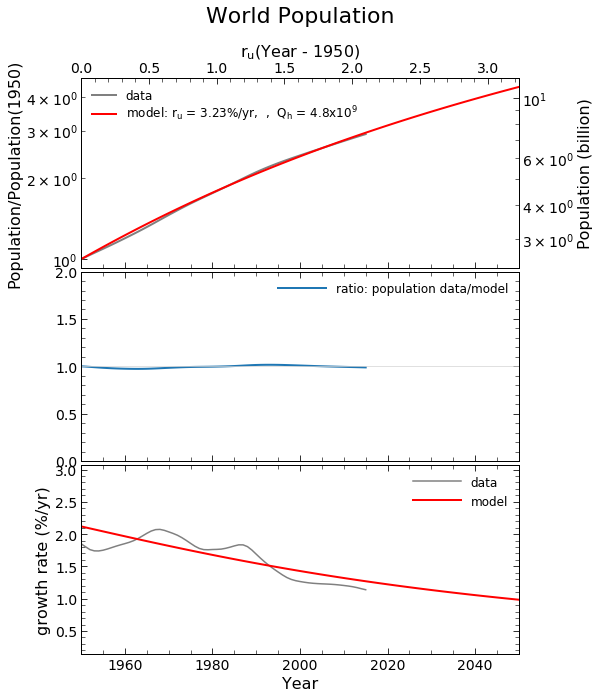

In [12]:
r0, Q_h, Q0, future, G_model, r_model = fitting('World', POP, Years, p0='', gdp=False)
basic_plot('World', Years, POP, r, avg, 
        r_u=r0, Qh=Q_h, future=future, dn=0, loc_top='upper left', loc_title=[0.5,0.2], 
        model_r=r_model, model_Q=G_model, POP=True, top_axis=True) 
plt.show()

[Back to the Top](#sec:World Population)


In [13]:
def fit_2_3_parameteres():
    data_set = Long                                                                       
    nation, Year, GDP = excel(*data_set, the_nation='US')                                   
    GDP *= 1.E6                                                                             
    print 'US 2- and 3-parameter GDP Analysis'                                                                                  
    r_u, Qh, Q0, future, G_model, r_model = fitting(nation, GDP, Year)                       
    p0 = [r_u, Qh/GDP[0], 1]                                                                 
    r_u, Qh, Q0, future, G_model, r_model = fitting(nation, GDP, Year, p0=p0, mode='sat3par')
                                                                                         
    r, avg = gr_data(GDP, Year)                                                              
    dn = 5; loc_top = 'upper left'; loc_bot = 'upper right'                                  
    Fig = basic_plot(nation, Year, GDP, r, avg,                                              
                     r_u=r_u, Qh=Qh, Q0=Q0,                                                  
                     loc_top=loc_top, loc_bot=loc_bot,                                       
                     future=future, top_axis=True, dn=5,                                     
                     model_r=r_model, model_Q=G_model)                                       
    plt.show()                                                                               

[Back to the Top](#Top)

# Data Analysis <a id='numerics'></a>

The model is described by eq. 2, defining implicitly $Q$ as a function of $t$ with the free parameters $r_u$ and $Q_h$. It's convenient to scale the data so that we work with $q = Q/Q[0]$, then the equation to solve is

$$
        \ln q + \frac{q - 1}{q_h} = \tau \qquad (A1)
$$

where $\tau = r_ut$. The solution is easily obtained with the Newton method: Introduce

$$
    f = \ln q + \frac{q - 1}{q_h} - \tau
$$

and start with a guess for $q$. Then the next guess is

$$
    q \to q - \frac{f}{f'}
$$
and so on. Convergence is very rapid if the initial guess is reasonable. Since the solution for $\tau = 0$ is $q = 1$, solving for an entire time series using the solution for each year as the initial quess for the next is quick and easy. 

The data were fitted with the python tool
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">curve_fit</a>, which uses non-linear least squares to fit a function to data. The tool offers the potential to employ different solution methods, but I used it as is without delving into its inner working. The tool failed when attempting to solve for the data $Q$ itself but worked very well when using the scaled data $q = Q/Q[0]$. I invoked it without any initial guess for the parameters and only constrained them to be positive. The tool returns a solution for the optimal parameters $\tt popt =[r_u, q_h]$ and the 2-d array $\tt pcov$, the estimated covariance of popt. Its diagonals provide the variance of the parameter estimates, and the one standard deviation errors on the parameters are computed from $\tt perr = np.sqrt(np.diag(pcov))$. From these I computed the relative errors $\tt perr/popt$ reported in the model results.

As noted, the only constraint I placed on the parameter search was $r_u, q_h > 0$. That resulted in one failure for dataset 'Long' (Japan) and 16 failures for the 'All67' dataset. Playing with the fits and placing the constraint $q_h \ge 1$ I discovered that curve_fit obtained what it conidered acceptable fits for everything. All the successful fits from the $q_h \ge 0$ fitting were unchanged. All the failures that became successes with $q_h \ge 1$ had $q_h = 1$. The relative errors on the model parameters seem larger. For example, the 'Long' data for Japan has 57 points, the relative errors on the fitted $r_u$ and $q_h$ were 3.47E-01 and 4.63E-01, respectively. By comparison, the errors for the US, with 227 points, were only 1.93E-03 and 3.10E-02. Still, the average deviation of the Japan model from data was just 10.79%, the largest deviation 25.17%, implying a very respectable fit. 

Many issues to address:

1. I have used curve_fit as a black-box and need a better understanding of its results. What is the confidence level we can place on the fitting results? Is there a measure of the meanigfulness of the fits? 

2. Can we understand, and get some control over, the dependence of modeling results on the data starting year (see the big difference for the UK and US between the 'Long' and 'All67' datasets)? 

3. Why does the fitting tool fail for some data with the $q_h \ge 0$ constraint yet succeeds with $q_h \ge 1$, deciding that a model with $q_h = 1$ is now acceptable? Why didn't curve_fit accept this solution when allowed to search all the way to $q_h \ge 0$?  It would be good to understand this. While we have more than enough successful fits without the $q_h \ge 1$ constraint, the failures include some of the world's biggest economies --- France, Germany, Italy and Japan. 


# 3-parameter fits <a id='3-parameters'></a>

The solution in eq. 2 (and A1) always passes through the first data point $Q[0]$ (i.e., $q[0] = 1$ always). In principle, though, we should retain the freedom of an up-or-down shift. That is, instead of $Q[0]$ we should introduce an additional free parameter $Q_0$ and re-write eq. 2 as

$$
    \ln\frac{Q}{Q_0} + \frac{Q - Q_0}{Q_h} = r_ut,             \qquad (2')
$$

resulting in the three free parameters $r_u, Q_h$ and $Q_0$. Instead of eq. A1, we should then fit the scaled data $q = Q/Q[0]$ with

$$
        \ln\frac{q}{q_0} + \frac{q - q_0}{q_h} = \tau  \qquad(A1')
$$

with $q_0 = Q_0/Q[0]$ as our 3rd parameter. It should be noted that the addition of the 3rd parameter can produce a change in shape, not just a shift. In a linear fit, relaxing the constraint $Q_0 = Q[0]$ allows a mere up-or-down shift on a linear scale. For an exponential, or pure power law, we again allow a shift on logarithmic scale. For a hindered solution, though, the initial, exponential part $Q_0\exp(r_ut)$ is shifted on logarithmic scale while the hindered, linear part is $Q_0 + Q_h r_u t$, which is shifted linearly.   

Fitting the US 'Long' data without a guess for the 3 paraeters failed, so I applied the following procedure: solve with 2 parameters, which works without an initial guess for $r_u$ and $q_h$ and uses a fixed $q_0 = 1$, then use the results as the initial guess for a 3-parameter fit. As seen below, this results in a successful fit but instead of improving the model it leads to a greatly inferior solution. This is puzzling.

1. We need a more in-depth study of the 3-parameter fitting procedure. 

2. Why does the solution move away from a successful 2-parameter fit toward an inferior solution when we add a free parameter? Why don't we get a better fit with this additional freedom? 


[Back to the Top](#sec:Todo)

US 2- and 3-parameter GDP Analysis
US: 227 data points
GDP has grown from 4.40E+09($10) in 1790 to 1.69E+13($10) in 2016
an increase by factor of 3.8e+03

*** 2-parameter fit [ru, qh]:
 Initial guess --- None
 Final result  --- [4.001E+00, 5.372E+03]
*** Best-fit parameters:
   ru = 4.00%      unhindered (unsaturated) growth rate
   Qh = 2.37E+13   Hindering (saturation) GDP in 2010USD 
   qh = Qh/Q0 = 5.37E+03
  Relative errors of fitting parameters:
   err(ru) = 1.93E-03
   err(Qh) = 3.10E-02
***Data covers a range of 9.04 growth times
***Hindering paramater H = 8.638E-02
   Hindering degree Qf/Qh = 0.713
   Hindering threshold (Q > Qh) will be crossed in 2030
   Hindered growth mode has a rate of 9.46E+11 USD10 per year
***Average deviation of model from data is 13.89%
   largest deviation of model from data is 46.46% in 1890

***Model predictions for 2050 for US economy:
   GDP of 3.42E+13 $10 and annual growth rate 1.64%

___________________________________________________________

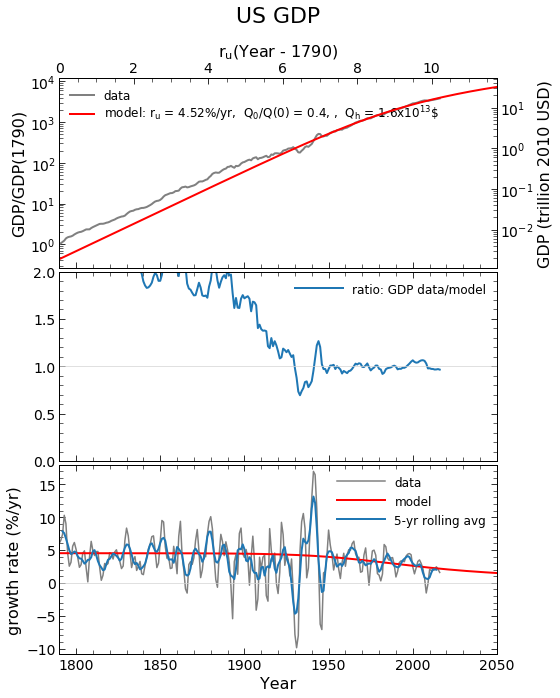

In [14]:
fit_2_3_parameteres()

[Back to the Top](#Top)